In [ ]:
import pandas as pd

# Load the datasets
buyrentkenya_df = pd.read_csv('buyrentkenya_property_listings.csv')
propco_rent_df = pd.read_csv('propco_listings-rent.csv')
propco_sale_df = pd.read_csv('propco_listings-sale.csv')

# Inspect buyrentkenya_property_listings.csv
buyrentkenya_info = buyrentkenya_df.info()
buyrentkenya_head = buyrentkenya_df.head()
buyrentkenya_describe = buyrentkenya_df.describe()

# Inspect propco_listings-rent.csv
propco_rent_info = propco_rent_df.info()
propco_rent_head = propco_rent_df.head()
propco_rent_describe = propco_rent_df.describe()

# Inspect propco_listings-sale.csv
propco_sale_info = propco_sale_df.info()
propco_sale_head = propco_sale_df.head()
propco_sale_describe = propco_sale_df.describe()

buyrentkenya_info, buyrentkenya_head, buyrentkenya_describe, propco_rent_info, propco_rent_head, propco_rent_describe, propco_sale_info, propco_sale_head, propco_sale_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12531 entries, 0 to 12530
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                12523 non-null  object 
 1   Other Location Details  12531 non-null  object 
 2   Size                    2752 non-null   object 
 3   Bedrooms                12494 non-null  float64
 4   Bathrooms               11564 non-null  float64
 5   Price                   12515 non-null  object 
 6   Property Type           12531 non-null  object 
 7   Purchase Type           12531 non-null  object 
dtypes: float64(2), object(6)
memory usage: 783.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       9980 non-null   object
 1   Beds           9980 non-null   object
 2   Baths          9980 non-n

(None,
         Location Other Location Details       Size  ...           Price  Property Type Purchase Type
 0  Ongata Rongai          Ongata Rongai        NaN  ...  KSh 16,400,000          House          Sale
 1    Windy Ridge                  Karen        NaN  ...  KSh 59,000,000          House          Sale
 2        Phase 2               Buruburu        NaN  ...  KSh 13,000,000          House          Sale
 3      Lavington              Lavington        NaN  ...  KSh 55,000,000          House          Sale
 4     Athi river              Kitengela  10000 ft²  ...  KSh 17,000,000          House          Sale
 
 [5 rows x 8 columns],
            Bedrooms     Bathrooms
 count  12494.000000  11564.000000
 mean       3.232512      3.370806
 std        1.469876      1.556233
 min        0.000000      1.000000
 25%        2.000000      2.000000
 50%        3.000000      3.000000
 75%        4.000000      4.000000
 max       10.000000     10.000000,
 None,
           Location Beds Baths To

# New Section

In [ ]:
import pandas as pd
import numpy as np


buyrentkenya_df = pd.read_csv('buyrentkenya_property_listings.csv')
propco_rent_df = pd.read_csv('propco_listings-rent.csv')
propco_sale_df = pd.read_csv('propco_listings-sale.csv')


buyrentkenya_df.columns = buyrentkenya_df.columns.str.strip().str.lower().str.replace(' ', '_')
propco_rent_df.columns = propco_rent_df.columns.str.strip().str.lower().str.replace(' ', '_')
propco_sale_df.columns = propco_sale_df.columns.str.strip().str.lower().str.replace(' ', '_')


buyrentkenya_df.dropna(subset=['location'], inplace=True)
buyrentkenya_df['bathrooms'].fillna(buyrentkenya_df['bathrooms'].mode()[0], inplace=True)
buyrentkenya_df.drop_duplicates(inplace=True)

propco_rent_df.drop_duplicates(inplace=True)

# For propco_sale_df
propco_sale_df.drop_duplicates(inplace=True)

# Add a 'source' column to identify the dataset origin
buyrentkenya_df['source'] = 'buyrentkenya'
propco_rent_df['source'] = 'propco_rent'
propco_sale_df['source'] = 'propco_sale'

# Merge the datasets
merged_df = pd.concat([buyrentkenya_df, propco_rent_df, propco_sale_df], ignore_index=True)

# Clean 'price' and 'size' columns
merged_df['price'] = merged_df['price'].str.replace('KSh', '').str.replace(',', '')
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')

merged_df['size'] = merged_df['size'].str.replace('ft²', '').str.replace(',', '')
merged_df['size'] = pd.to_numeric(merged_df['size'], errors='coerce')

# Convert remaining numeric columns to numeric types
for col in ['beds', 'baths', 'toilets', 'bedrooms', 'bathrooms']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Fill missing values with median
for col in ['size', 'price', 'beds', 'baths', 'toilets', 'bedrooms', 'bathrooms']:
    median_value = merged_df[col].median()
    merged_df[col].fillna(median_value, inplace=True)

# Save the cleaned and merged dataframe to a CSV file
merged_df.to_csv('cleaned_merged_property_listings.csv', index=False)




        location other_location_details     size  bedrooms  ...        source  beds baths toilets
0  Ongata Rongai          Ongata Rongai   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
1    Windy Ridge                  Karen   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
2        Phase 2               Buruburu   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
3      Lavington              Lavington   2400.0       5.0  ...  buyrentkenya   2.0   2.0     2.0
4     Athi river              Kitengela  10000.0       4.0  ...  buyrentkenya   2.0   2.0     2.0

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                19534 non-null  object 
 1   other_location_details  9876 non-null   object 
 2   size                    19534 non-null  float64
 3   bedrooms  

In [ ]:
merged_df.head()

,location,other_location_details,size,bedrooms,bathrooms,price,property_type,purchase_type,source,beds,baths,toilets
0,Ongata Rongai,Ongata Rongai,2400.0,4.0,2.0,16400000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
1,Windy Ridge,Karen,2400.0,4.0,4.0,59000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
2,Phase 2,Buruburu,2400.0,4.0,2.0,13000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
3,Lavington,Lavington,2400.0,5.0,5.0,55000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
4,Athi river,Kitengela,10000.0,4.0,4.0,17000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0


In [ ]:
merged_df.describe()

,size,bedrooms,bathrooms,price,beds,baths,toilets
count,1.953400e+04,19534.000000,19534.000000,1.953400e+04,19534.000000,19534.000000,19534.000000
mean,2.518347e+03,3.131207,3.142828,2.301434e+07,2.123221,2.102846,2.086516
std,1.430220e+04,1.063266,1.114577,8.907297e+07,0.937520,0.999984,1.025548
min,8.500000e+01,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.400000e+03,3.000000,3.000000,3.500000e+04,2.000000,2.000000,2.000000
50%,2.400000e+03,3.000000,3.000000,6.713000e+06,2.000000,2.000000,2.000000
75%,2.400000e+03,3.000000,3.000000,1.600000e+07,2.000000,2.000000,2.000000
max,2.000000e+06,10.000000,10.000000,4.500000e+09,10.000000,10.000000,10.000000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                19534 non-null  object 
 1   other_location_details  9876 non-null   object 
 2   size                    19534 non-null  float64
 3   bedrooms                19534 non-null  float64
 4   bathrooms               19534 non-null  float64
 5   price                   19534 non-null  float64
 6   property_type           19534 non-null  object 
 7   purchase_type           19534 non-null  object 
 8   source                  19534 non-null  object 
 9   beds                    19534 non-null  float64
 10  baths                   19534 non-null  float64
 11  toilets                 19534 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


In [ ]:
from google.colab import files
files.download('cleaned_merged_property_listings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [ ]:
with open('cleaned_merged_property_listings.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
data = pd.read_csv('cleaned_merged_property_listings.csv', encoding='Windows-1252')

In [ ]:
data.head()

,location,other_location_details,size,bedrooms,bathrooms,price,property_type,purchase_type,source,beds,baths,toilets
0,Ongata Rongai,Ongata Rongai,2400.0,4.0,2.0,16400000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
1,Windy Ridge,Karen,2400.0,4.0,4.0,59000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
2,Phase 2,Buruburu,2400.0,4.0,2.0,13000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
3,Lavington,Lavington,2400.0,5.0,5.0,55000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0
4,Athi river,Kitengela,10000.0,4.0,4.0,17000000.0,House,Sale,buyrentkenya,2.0,2.0,2.0


In [ ]:
data.shape

(19534, 12)

<Axes: >

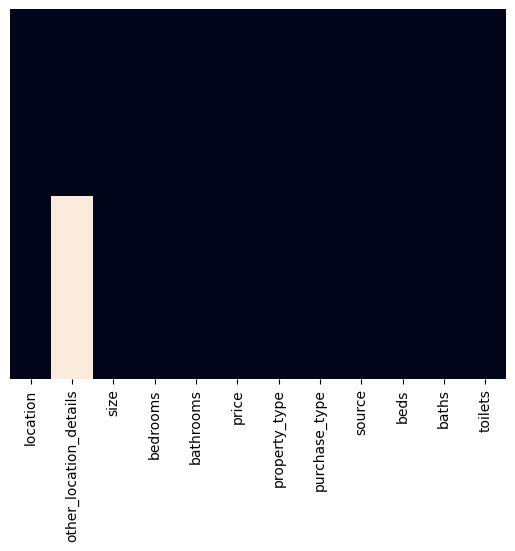

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [ ]:
data.bathrooms.unique()

array([ 2.,  4.,  5.,  3.,  6.,  7., 10.,  8.,  9.,  1.])

In [ ]:
data.isnull().sum()

,0
location,0
other_location_details,9658
size,0
bedrooms,0
bathrooms,0
price,0
property_type,0
purchase_type,0
source,0
beds,0


In [ ]:
data['other_location_details'].fillna(data.other_location_details.mode(), inplace=True)

In [ ]:
data.columns

Index(['location', 'other_location_details', 'size', 'bedrooms', 'bathrooms',
       'price', 'property_type', 'purchase_type', 'source', 'beds', 'baths',
       'toilets'],
      dtype='object')

In [ ]:
df1 = data[[ 'size', 'bedrooms', 'bathrooms',
       'price', 'beds', 'baths',
       'toilets']]

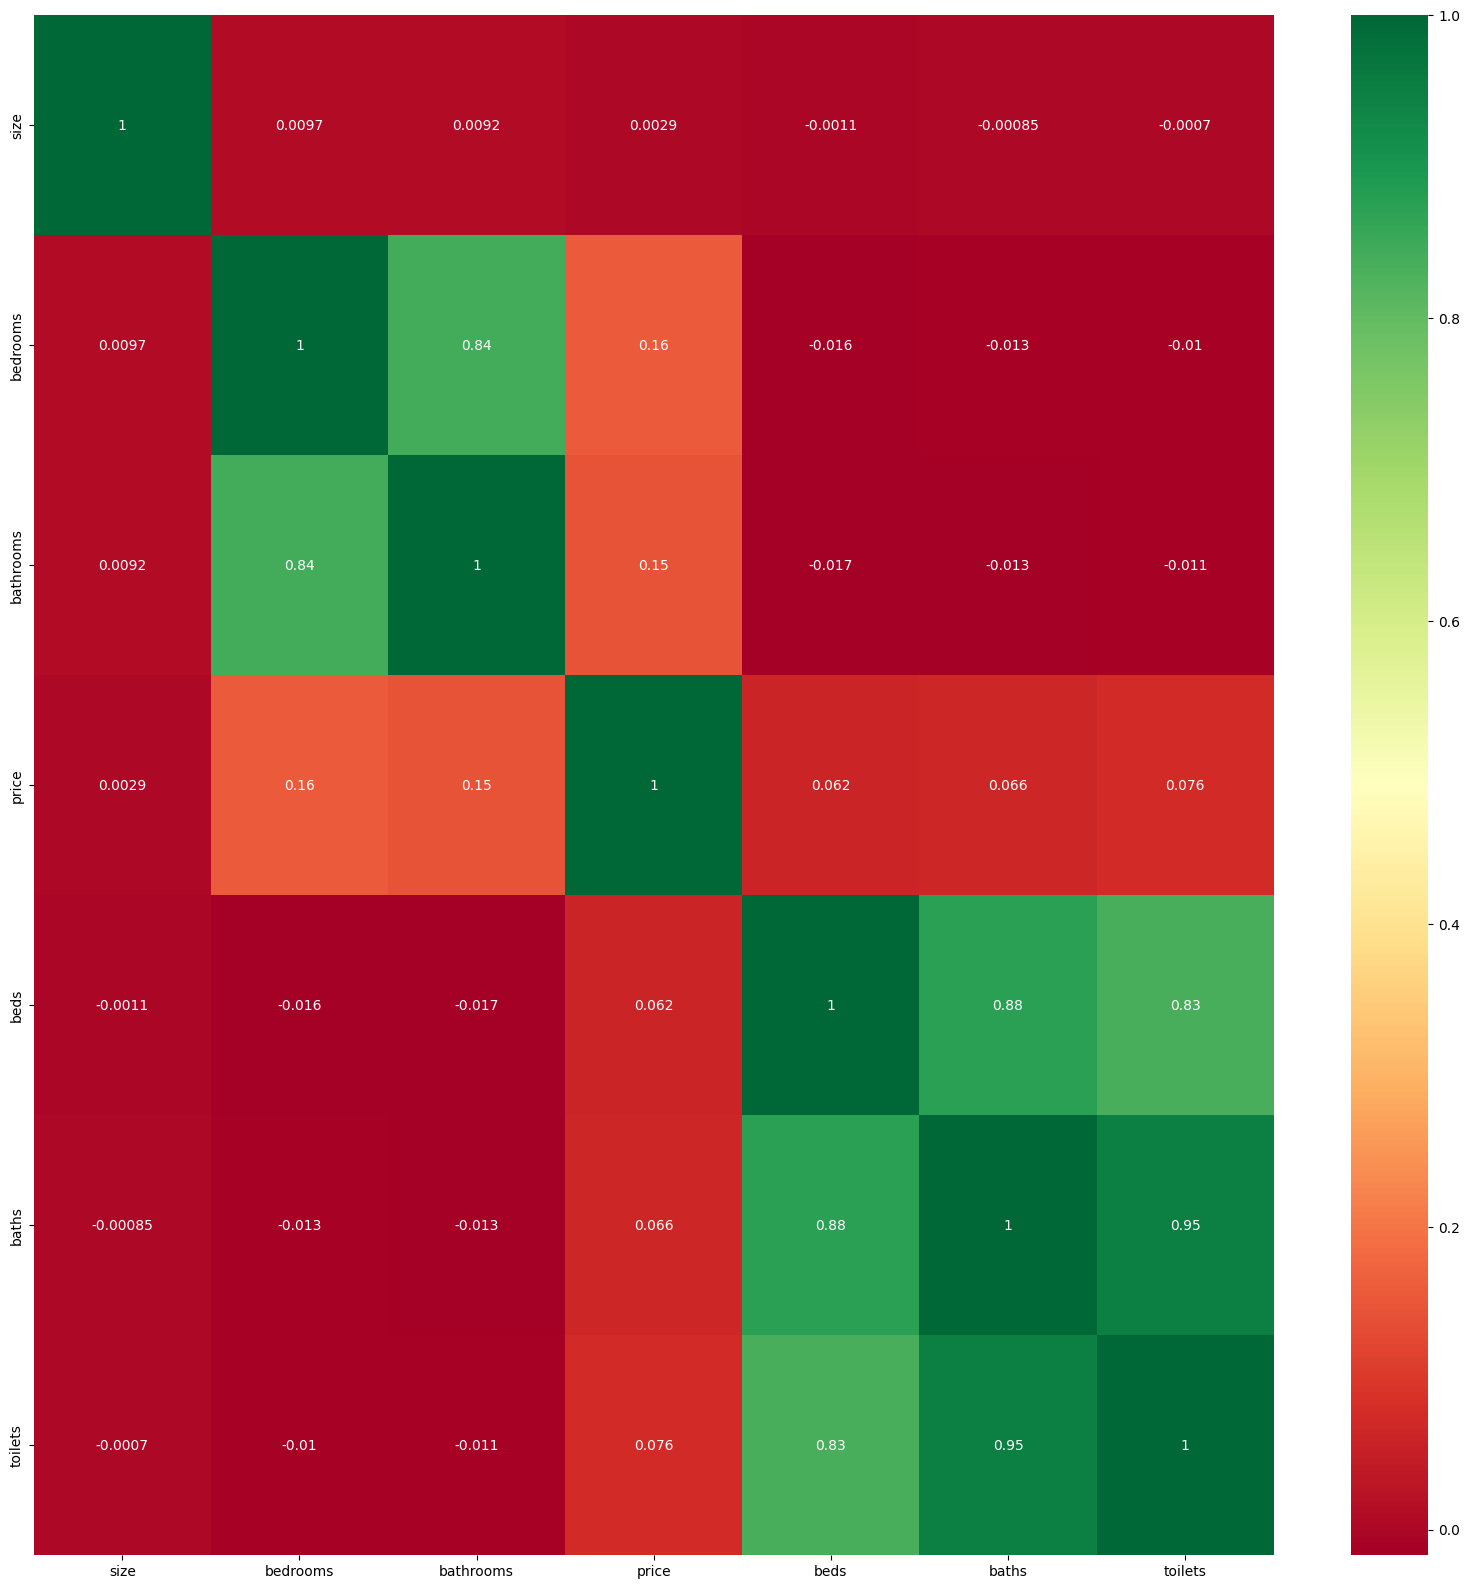

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap = "RdYlGn")
plt.show()
#

<Axes: xlabel='price', ylabel='Density'>

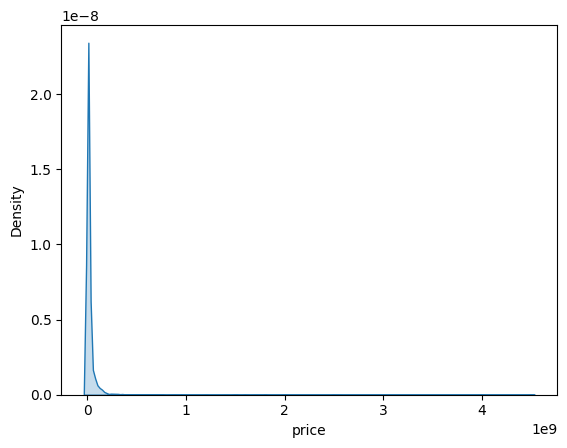

In [ ]:
sns.kdeplot(data['price'], shade =True)

<Axes: ylabel='price'>

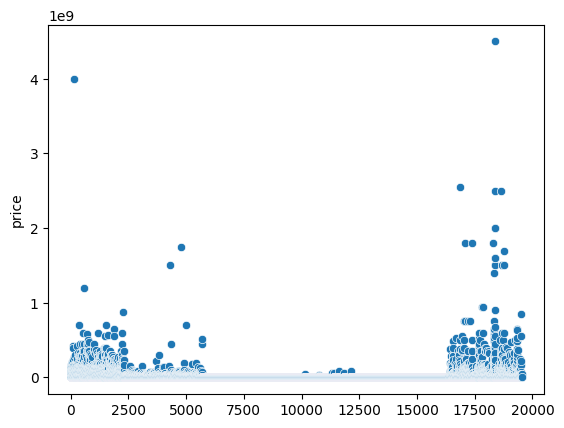

In [ ]:
sns.scatterplot(data=data['price'])

In [ ]:
Q1=3.500000e+04
Q3=1.600000e+07
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 15965000.0


In [ ]:
data.price.describe()

,price
count,1.953400e+04
mean,2.301434e+07
std,8.907297e+07
min,0.000000e+00
25%,3.500000e+04
50%,6.713000e+06
75%,1.600000e+07
max,4.500000e+09


<Axes: xlabel='size', ylabel='price'>

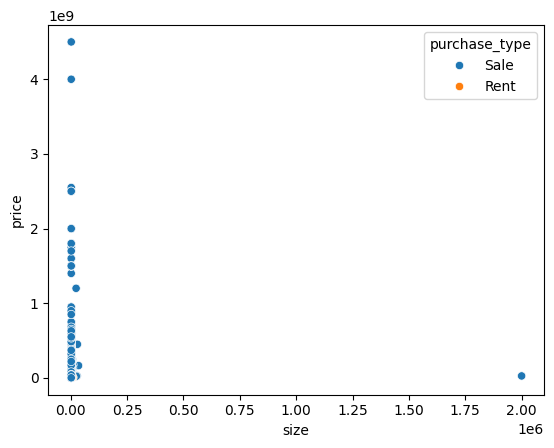

In [ ]:
sns.scatterplot(x=data['size'], y=data['price'], hue=data['purchase_type'])

In [ ]:
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 39947500.0
Low value of our totalPrice Features is -23912500.0


In [ ]:
df = data.copy()

In [ ]:
df=df[df['price']<=High]
df=df[df['price']>=Low]

<Axes: ylabel='price'>

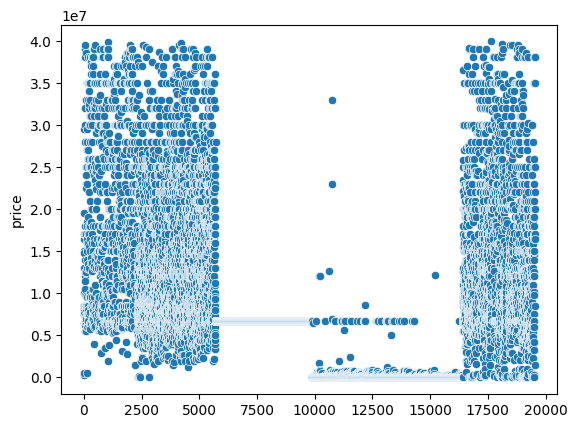

In [ ]:
sns.scatterplot(data=df['price'])

In [ ]:
print(data.shape)
print(df.shape)

(19534, 12)
(17141, 12)


In [ ]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = 2393


In [ ]:
df.columns

Index(['location', 'other_location_details', 'size', 'bedrooms', 'bathrooms',
       'price', 'property_type', 'purchase_type', 'source', 'beds', 'baths',
       'toilets'],
      dtype='object')

In [ ]:
df.drop(['other_location_details'], axis=1, inplace=True)

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
df.isnull().sum()

,0
location,0
size,0
bedrooms,0
bathrooms,0
price,0
property_type,0
purchase_type,0
source,0
beds,0
baths,0


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ValueError: could not convert string to float: 'Ongata Rongai'

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
print(X_train.head())
print(y_train.head())


                     location other_location_details    size  ...  beds  baths toilets
6690       four ways junction            Kiambu Road  2400.0  ...   2.0    2.0     2.0
1255           Daggorett road                  Karen  2400.0  ...   2.0    2.0     2.0
3315                 Kilimani               Kilimani  2400.0  ...   2.0    2.0     2.0
3684   Off Wood Avenue Lenana               Kilimani  2400.0  ...   2.0    2.0     2.0
10223       Westlands Nairobi                    NaN  2400.0  ...   4.0    3.0     3.0

[5 rows x 11 columns]
6690      6713000.0
1255     75000000.0
3315     12000000.0
3684     11500000.0
10223    12000000.0
Name: price, dtype: float64


In [ ]:
X_train = pd.get_dummies(X_train, columns=['location', 'other_location_details'])


In [ ]:
X_train.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


In [ ]:
X_train['size'] = pd.to_numeric(X_train['size'], errors='coerce')
X_train['beds'] = pd.to_numeric(X_train['beds'], errors='coerce')
X_train['baths'] = pd.to_numeric(X_train['baths'], errors='coerce')
X_train['toilets'] = pd.to_numeric(X_train['toilets'], errors='coerce')


In [ ]:
X_train = pd.get_dummies(X_train)


In [ ]:
X_train.fillna(method='ffill', inplace=True)


In [ ]:
y_train = pd.to_numeric(y_train, errors='coerce')



In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("By using Linear Regression I got")
print("Training Score:", lr_model.score(X_train, y_train))
new_var = print("Testing Score:", lr_model.score(X_test, y_test))
new_var

By using Linear Regression I got
Training Score: 0.4614233187586797


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- location
- other_location_details
- property_type
- purchase_type
- source
Feature names seen at fit time, yet now missing:
- location_0614J
- location_0614N
- location_0614n
- location_0619J
- location_0619n
- ...


In [ ]:
# Fit and transform X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Transform X_test with the same encoder
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure both DataFrames have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
print("Training columns:", X_train_encoded.columns)
print("Testing columns:", X_test_encoded.columns)


Training columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       ...
       'other_location_details_zagoretti, Runda, Westlands',
       'property_type_Apartment', 'property_type_Bedsitter',
       'property_type_House', 'property_type_Other', 'purchase_type_Rent',
       'purchase_type_Sale', 'source_buyrentkenya', 'source_propco_rent',
       'source_propco_sale'],
      dtype='object', length=3858)
Testing columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       ...
       'other_location_details_zagoretti, Runda, Westlands',
       'property_type_Apartment', 'property_type_Bedsitter',
       'property_type_House', 'property_type_Other', 'purchase_type_Rent',
       'purchase_type_Sale', 'source_buyrentkenya', 'source_propco_rent',
       'source_propco_sale'],
      dtype=

In [ ]:
# Verify that both datasets have the same columns in the same order
assert list(X_train_encoded.columns) == list(X_test_encoded.columns)


In [ ]:
print("Training columns:", X_train_encoded.columns[:20])  # Print first 20 columns
print("Testing columns:", X_test_encoded.columns[:20])   # Print first 20 columns


Training columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       'location_0619n', 'location_0621J', 'location_0621j', 'location_0625J',
       'location_0626J', 'location_0628n', 'location_0701n', 'location_0703J',
       'location_0704J', 'location_0708J'],
      dtype='object')
Testing columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       'location_0619n', 'location_0621J', 'location_0621j', 'location_0625J',
       'location_0626J', 'location_0628n', 'location_0701n', 'location_0703J',
       'location_0704J', 'location_0708J'],
      dtype='object')


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

print("By using Linear Regression I got")
print("Training Score:", lr_model.score(X_train_encoded, y_train))
print("Testing Score:", lr_model.score(X_test_encoded, y_test))


By using Linear Regression I got
Training Score: 0.4614233187586797
Testing Score: -0.34198308287473167


In [ ]:
# Encode categorical features for both training and testing datasets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
# Check if columns are aligned
assert list(X_train_encoded.columns) == list(X_test_encoded.columns)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Encode categorical features for both training and testing datasets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in both datasets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
print("Training columns:", X_train_encoded.columns)
print("Testing columns:", X_test_encoded.columns)


Training columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       ...
       'other_location_details_zagoretti, Runda, Westlands',
       'property_type_Apartment', 'property_type_Bedsitter',
       'property_type_House', 'property_type_Other', 'purchase_type_Rent',
       'purchase_type_Sale', 'source_buyrentkenya', 'source_propco_rent',
       'source_propco_sale'],
      dtype='object', length=3858)
Testing columns: Index(['size', 'bedrooms', 'bathrooms', 'beds', 'baths', 'toilets',
       'location_0614J', 'location_0614N', 'location_0614n', 'location_0619J',
       ...
       'other_location_details_zagoretti, Runda, Westlands',
       'property_type_Apartment', 'property_type_Bedsitter',
       'property_type_House', 'property_type_Other', 'purchase_type_Rent',
       'purchase_type_Sale', 'source_buyrentkenya', 'source_propco_rent',
       'source_propco_sale'],
      dtype=

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Fit the model
rfm = RandomForestRegressor()
rfm.fit(X_train_scaled, y_train)

# Evaluate the model
print("Training Score:", rfm.score(X_train_scaled, y_train))
print("Testing Score:", rfm.score(X_test_scaled, y_test))


Training Score: 0.753806181866135
Testing Score: -0.30281671202651994


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('cleaned_merged_property_listings.csv')
print(data.head())
print(data.info())
print(data.describe())

        location other_location_details     size  bedrooms  ...        source  beds baths toilets
0  Ongata Rongai          Ongata Rongai   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
1    Windy Ridge                  Karen   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
2        Phase 2               Buruburu   2400.0       4.0  ...  buyrentkenya   2.0   2.0     2.0
3      Lavington              Lavington   2400.0       5.0  ...  buyrentkenya   2.0   2.0     2.0
4     Athi river              Kitengela  10000.0       4.0  ...  buyrentkenya   2.0   2.0     2.0

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19534 entries, 0 to 19533
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                19534 non-null  object 
 1   other_location_details  9876 non-null   object 
 2   size                    19534 non-null  float64
 3   bedrooms  

location                     0
other_location_details    9658
size                         0
bedrooms                     0
bathrooms                    0
price                        0
property_type                0
purchase_type                0
source                       0
beds                         0
baths                        0
toilets                      0
dtype: int64


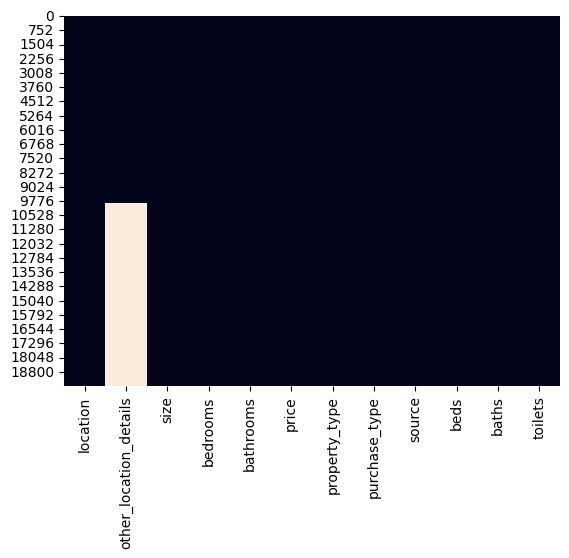

In [ ]:
print(data.isnull().sum())
    # Visualize missing values using a heatmap
sns.heatmap(data.isnull(), cbar=False)
plt.show()

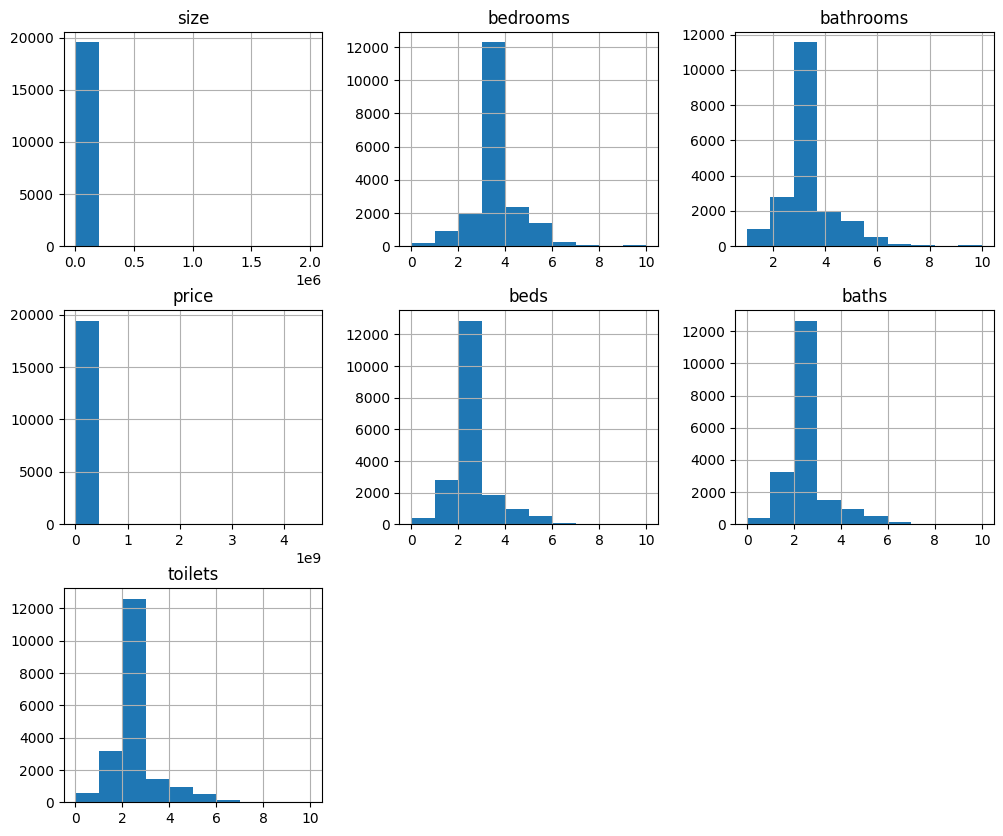

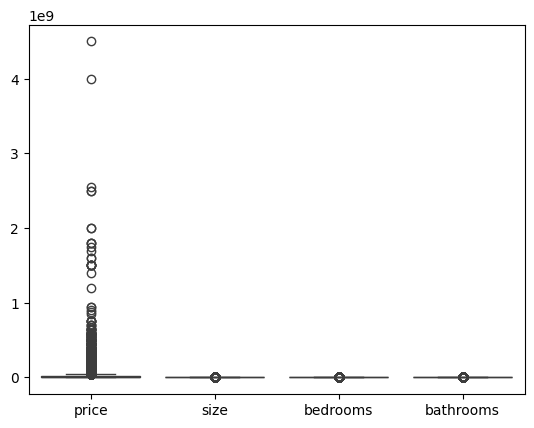

In [ ]:
# Histograms for numerical features
data.hist(figsize=(12, 10))
plt.show()
# Boxplots for numerical features
sns.boxplot(data=data[['price', 'size', 'bedrooms', 'bathrooms']])
plt.show()

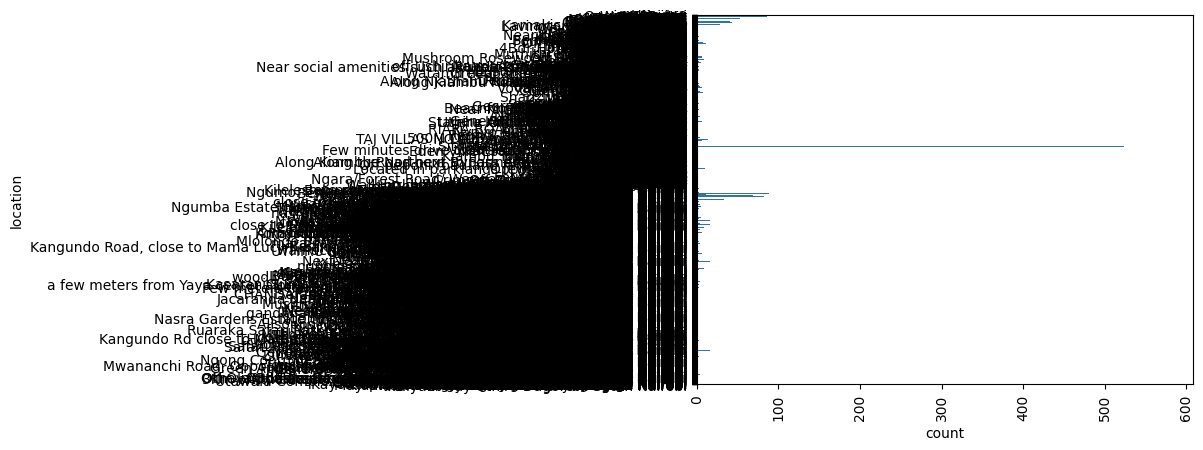

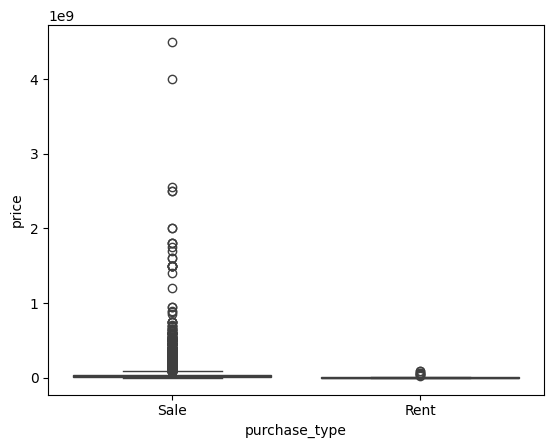

In [ ]:
# Countplots for categorical features
sns.countplot(data['location'])
plt.xticks(rotation=90)
plt.show()
# Explore relationships between categorical features and price
sns.boxplot(x='purchase_type', y='price', data=data)
plt.show()